In [1]:
print("Hello; World")

Hello; World


In [2]:
def power_law(x, a, p):
    # After the declaration, use tabs to define the function internals
    # We use * for multiplication, and ** for exponentiation
    my_result = a * x**p
    return my_result


a_test = 4
p_test = 2
print(power_law(10, a=a_test, p=p_test), power_law(2, a_test, p_test))

400 16


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x_sparse = np.array([0, 2, 5, 7, 10])
x_dense = np.linspace(0, 10, 100)

In [5]:
y_sparse = power_law(x_sparse, a_test, p_test)
y_dense = power_law(x_dense, a_test, p_test)
print(y_sparse.shape)
print(y_dense.shape)

(5,)
(100,)


Text(0, 0.5, 'Current [mA]')

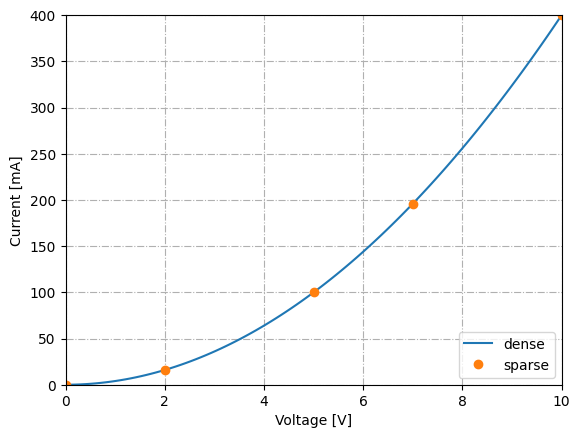

In [6]:
plt.plot(x_dense, y_dense, label="dense")
plt.plot(x_sparse, y_sparse, "o", label="sparse")
plt.legend(loc="lower right")
plt.xlim(left=0, right=10)
plt.ylim(bottom=0, top=400)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

In [7]:
import pandas as pd

df_current = pd.read_csv("../ezfit/data/current_data.csv")
df_voltage = pd.read_csv("../ezfit/data/voltage_data.csv")

In [8]:
display(df_current.head())
display(df_voltage.head())

,time,current
0,0.2,0.980067
1,0.7,0.764842
2,1.2,0.362358
3,1.7,-0.128844
4,2.2,-0.588501


,time,voltage
0,0.0,0.000000
1,0.5,0.479426
2,1.0,0.841471
3,1.5,0.997495
4,2.0,0.909297


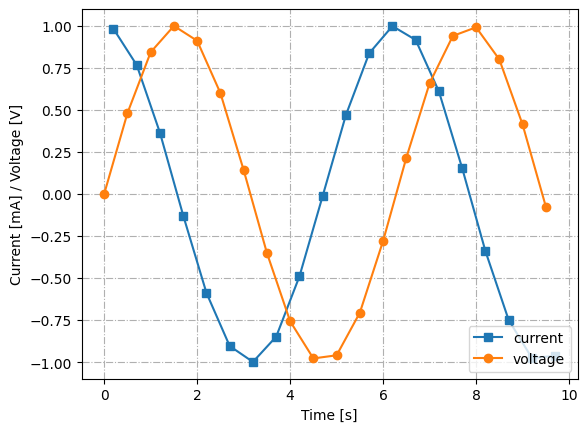

In [9]:
ax = df_current.plot(x="time", y="current", style="s-")
df_voltage.plot(x="time", y="voltage", style=["o-"], ax=ax)
plt.xlabel("Time [s]")
plt.ylabel("Current [mA] / Voltage [V]")
plt.legend(loc="lower right")
plt.grid(True, ls="-.")

In [10]:
# To select a column use df[“column_name”]
common_t = df_voltage["time"]  # this is like a pointer if you are familiar
# new_data = np.interp(new_domain, old_domain, old_data)
common_current = np.interp(common_t, df_current["time"], df_current["current"])
df_current_interp = pd.DataFrame(
    {  # use new lines to keep things readable
        "time": common_t,  # if you are wrapped in () you
        "current": common_current,  # are good to make new lines!
    }
)

In [11]:
df_merged = pd.merge(df_voltage, df_current_interp, on="time")
df_merged["power"] = df_merged["current"] * df_merged["voltage"]

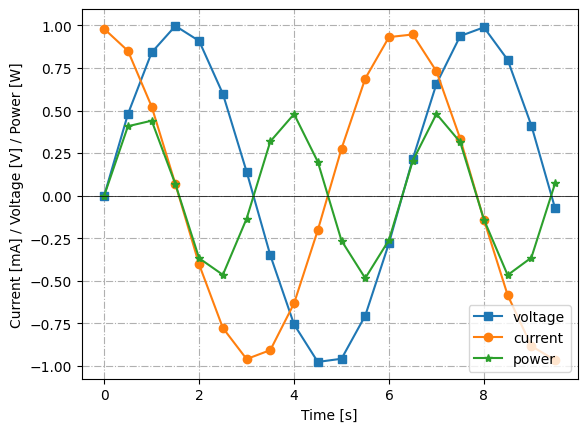

In [12]:
ax = df_merged.plot(x="time", style=["s-", "o-", "*-"])
ax.axhline(y=0, color="k", ls="-", lw=0.5)
plt.xlabel("Time [s]")
plt.grid(True, ls="-.")
plt.ylabel("Current [mA] / Voltage [V] / Power [W]")
plt.legend(loc="lower right")

In [13]:
df_data = pd.read_csv("../ezfit/data/powerlaw.csv")

In [14]:
df_data

,x,y,y_2,y_noisy,y_noisy_2
0,0.100000,0.004000,0.001000,0.004103,0.000976
1,0.117210,0.005495,0.001610,0.005833,0.001244
2,0.137382,0.007550,0.002593,0.008131,0.002445
3,0.161026,0.010372,0.004175,0.009706,0.003600
4,0.188739,0.014249,0.006723,0.013684,0.007389
5,0.221222,0.019576,0.010826,0.020806,0.012159
6,0.259294,0.026893,0.017433,0.024362,0.016919
7,0.303920,0.036947,0.028072,0.043443,0.027655
8,0.356225,0.050758,0.045204,0.053929,0.047716
9,0.417532,0.069733,0.072790,0.065696,0.073297


<Axes: xlabel='x'>

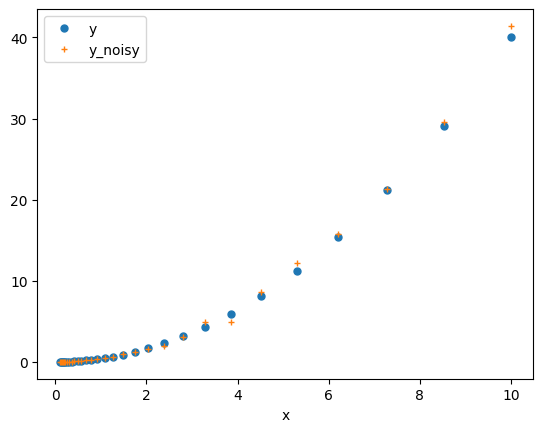

In [15]:
df_data.plot(x="x", y=["y", "y_noisy"], style=["o", "+"], ms=5)

Text(0, 0.5, 'Current [mA]')

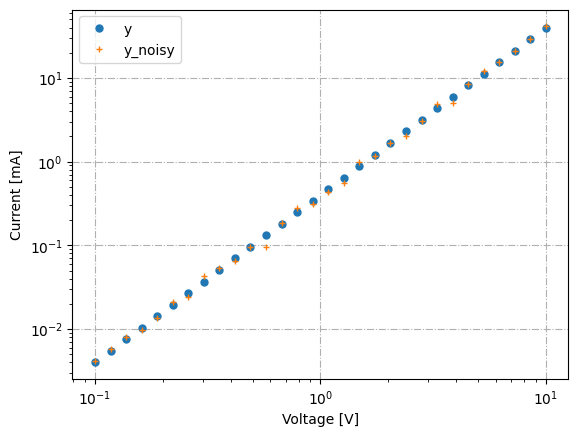

In [16]:
df_data.plot(x="x", y=["y", "y_noisy"], style=["o", "+"], ms=5, loglog=True)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

Text(0.5, 0, 'Log Voltage [log(V)]')

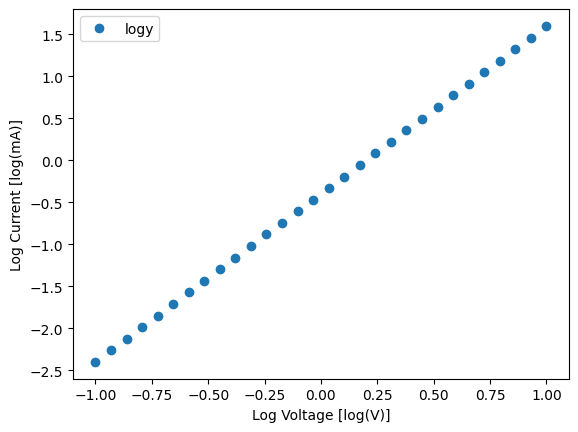

In [17]:
df_data["logx"] = np.log10(df_data["x"])
df_data["logy"] = np.log10(df_data["y"])
df_data.plot(x="logx", y="logy", style="o")
plt.ylabel("Log Current [log(mA)]")
plt.xlabel("Log Voltage [log(V)]")

In [18]:
import ezfit

power_law()
  0.39=0.39±0.017, 2.02=2.02±0.021
  R²=0.9991, RMSE=0.2882, BIC=-67.83, AIC=-70.64

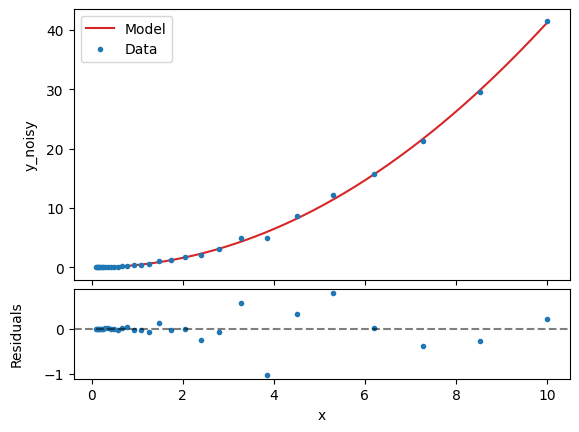

In [20]:
fit_results, *_ = df_data.fit(
    power_law,
    x="x",
    y="y_noisy",
    a=0.4,
    p=2,
)
fit_results

In [21]:
print(fit_results)

power_law()
  0.39=0.39±0.017, 2.02=2.02±0.021
  R²=0.9991, RMSE=0.2882, BIC=-67.83, AIC=-70.64


Text(2, 40, 'a: 0.39\np: 2.02\n')

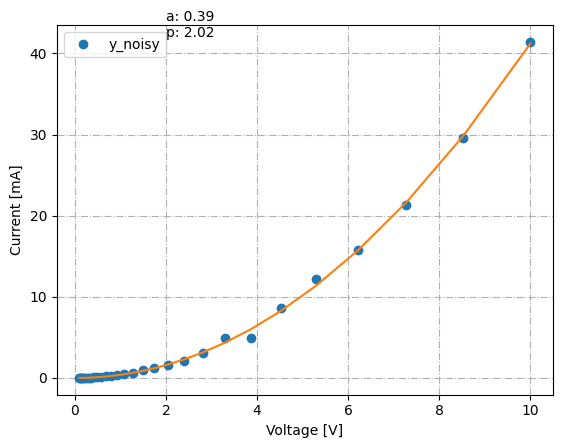

In [23]:
df_data.plot(x="x", y="y_noisy", style="o")
plt.plot(df_data["x"], fit_results(df_data["x"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
s = "".join([f"{n}: {p.value:.2f}\n" for n, p in fit_results.params.items()])
plt.annotate(s, (2, 40))

In [24]:
print(fit_results)

power_law
a : (value = 0.39 ± 0.017, bounds = (-inf, inf))
p : (value = 2.02 ± 0.021, bounds = (-inf, inf))
R²: 0.9991
RMSE: 0.2882
covariance:
[[ 0.0003 -0.0003]
 [-0.0003  0.0004]]
correlation:
[[ 1.     -0.9936]
 [-0.9936  1.    ]]


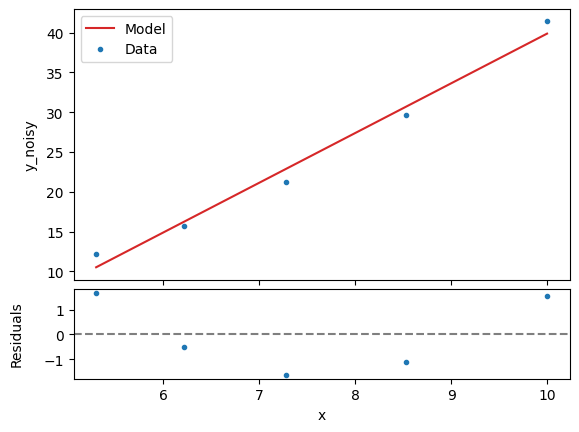

In [25]:
def line(x, m, b):
    return m * x + b


line_results, *_ = df_data.query("x>5").fit(
    line,
    x="x",
    y="y_noisy",
)

Text(0.5, 200, 'm: 6.25\nb: -22.58\n')

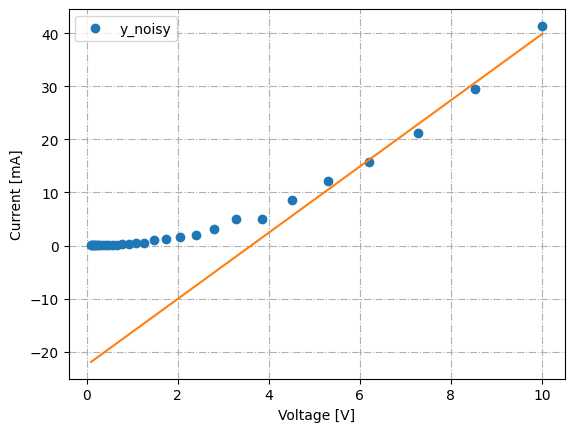

In [26]:
df_data.plot(x="x", y="y_noisy", style="o")
plt.plot(df_data["x"], line_results(df_data["x"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
s = "".join([f"{n}: {p.value:.2f}\n" for n, p in line_results.params.items()])
plt.annotate(s, (0.5, 200))

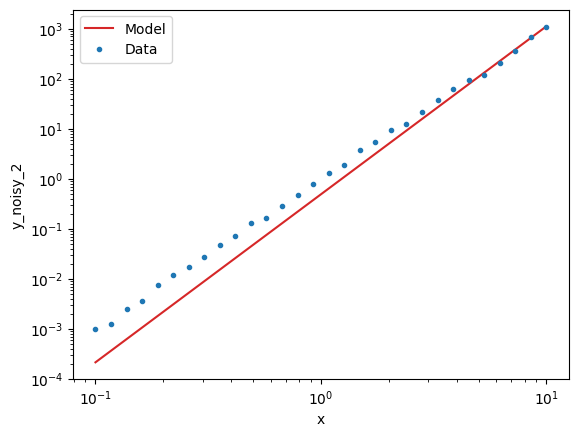

In [27]:
fit_results2, *ax = df_data.fit(power_law, x="x", y="y_noisy_2", residuals="none")
plt.yscale("log")
plt.xscale("log")

In [28]:
(3 - 3.36) / 0.06

-5.999999999999998

Text(0, 0.5, 'Current [mA]')

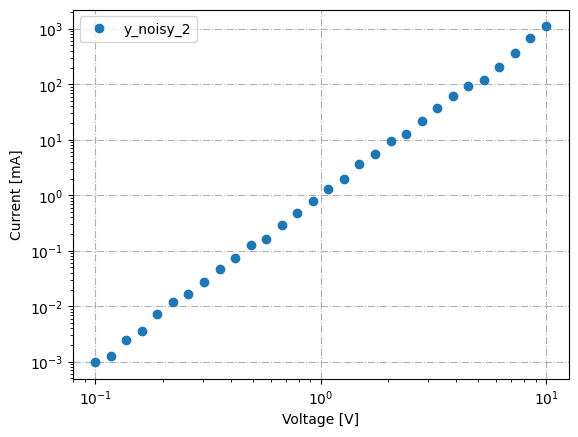

In [29]:
df_data.plot(x="x", y="y_noisy_2", style="o", loglog=True)

plt.grid(True, ls="-.")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

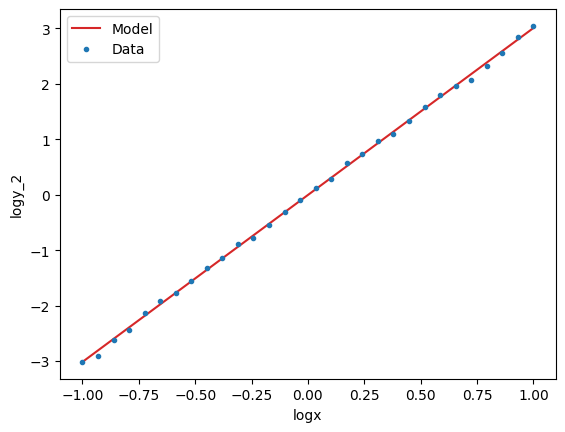

In [31]:
df_data["logy_2"] = np.log10(df_data["y_noisy_2"])
fit_results_linear, *_ = df_data.fit(line, x="logx", y="logy_2", residuals="none")

Text(0, 0.5, 'Current [mA]')

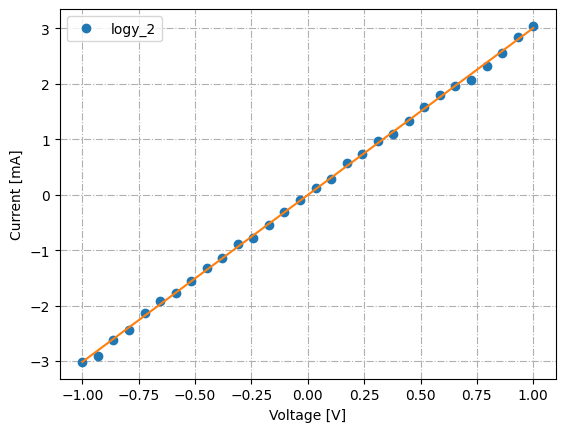

In [40]:
ax = df_data.plot(x="logx", y="logy_2", style="o")
fit_results_linear.plot(ax=ax)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

Text(0, 0.5, 'Current [mA]')

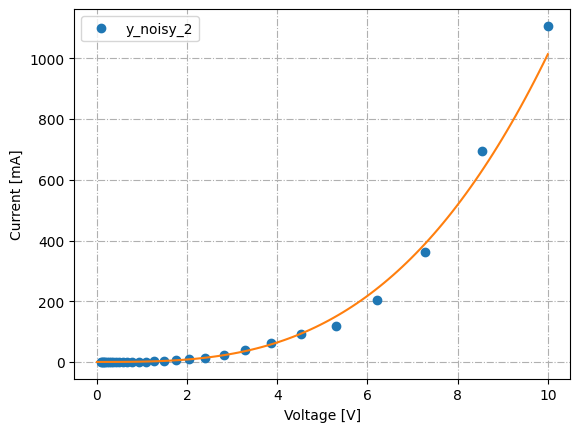

In [42]:
p = fit_results_linear.params
power = p["m"].value
A = 10 ** p["b"].value

ax = df_data.plot(x="x", y="y_noisy_2", style="o")
x_new = np.linspace(0, 10, 100)
plt.plot(x_new, power_law(x_new, A, power))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")